## 모델 학습: 선형 회귀

* 대표적인 회귀 알고리즘입니다. 
* 선형이란 말처럼 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘이다. 
* 이때 직선을 학습한다는 말은 특성을 가장 잘 나타낼 수 있는 직선을 찾는다는 의미이다.  



In [7]:
import pandas as pd
fish_df = pd.read_csv('./data/fish.csv')
fish_df.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


In [9]:
y_data=fish_df['무게']
x_data=fish_df.drop('무게',axis=1)

In [10]:
y_data.shape, x_data.shape

((56,), (56, 1))

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드

fish_df = pd.read_csv('./data/fish.csv')

##########데이터 분석

##########데이터 전처리

y_data=fish_df['무게']
x_data=fish_df.drop('무게',axis=1)

#회귀
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

##########모델 생성

model = LinearRegression()

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(model.score(x_train, y_train)) #0.9371680443381393
print(model.score(x_test, y_test)) #0.8324765337629763



##########모델 예측

x_test = np.array([
    [50]
])

y_predict = model.predict(x_test)

print(y_predict[0]) #1245.423930742852

#model객체에 coef_와 intercept_ 속성에 저장되어 있음
print(model.coef_ , model.intercept_)

0.9111335077849486
0.9341519682404069
1214.4057041788446
[37.02646696] -636.9176440163857


---
**[농어 무게 예측 방정식]**

$y = 39.27*x - 718.43$

---

> * coef_는 기울기, intercept_를 절편이다.
> * 머신러닝에서는 기울기를 계수(coefficient) 또는 가중치(weight)라고 부른다.
> * 이는 머신러닝 알고리즘이 학습을 하고 찾은 값이라는 의미로 모델 파라미터라고 부른다. 
> * 많은 머신러닝 알고리즘의 훈련과정은 최적의 모델 파라미터를 찾는 것과 같다. 

In [3]:
fish_df.head(3)

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0


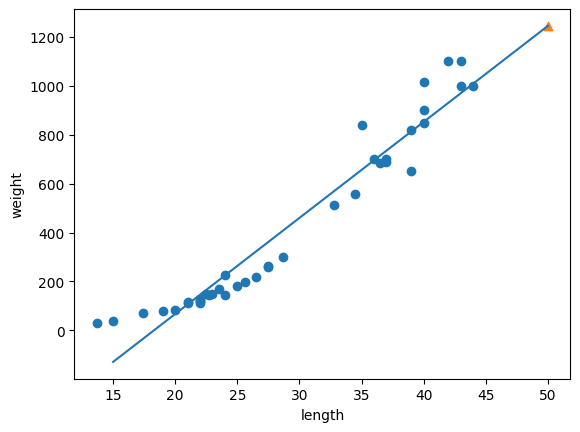

In [4]:
import matplotlib.pyplot as plt

# 훈련 세트의 산점도를 그립니다
plt.scatter(x_train, y_train)

# 농어의 길이 15에서 50까지 1차 방정식 직선 그래프를 그립니다
plt.plot([15, 50], [15*model.coef_+model.intercept_, 50*model.coef_+model.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1245.42, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> * 길이가 50cm인 농어에 대한 예측은 이 직선의 연장선에 있다.
> * 이제 훈련 세트 범위를 벗어난 농어의 무게도 예측가능하게 되었다. 

> * 훈련세트에 비해서 테스트 세트의 성능이 많이 떨어지는 것을 보아 과대적합이 된 것 같다. 
> * 그리고 그래프 왼쪽아래가 이상하다.
> * 무게를 음수로 예측하다니...


> * 1차 선형방정식이니 무게가 음수로 예측될 수 밖에 없다. 
> * 좀 더 예측력을 높이기 위해 곡선인 다항 회귀로 접근해야 겠다. 

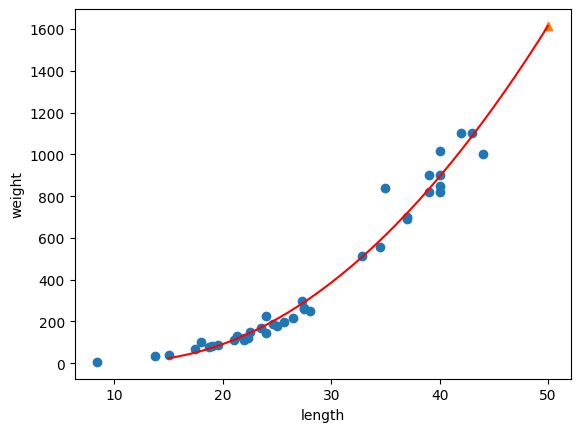

In [16]:
# 2차 다항회귀 접근

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 특성을 제곱하여 새로운 특성으로 추가
poly = PolynomialFeatures(degree=2, include_bias=False)  # degree=2는 제곱항을 의미
poly_x_train = poly.fit_transform(x_train)

# 선형 회귀 모델 훈련
model_poly = LinearRegression()
model_poly.fit(poly_x_train, y_train)

# 50cm 농어의 특성을 변환
poly_x_50 = poly.transform([[50]])

# 50cm 농어의 무게 예측
y_pred_50 = model_poly.predict(poly_x_50)

# 그래프 그리기
points = np.arange(15, 51).reshape(-1, 1)   # 15에서 50까지의 연속된 값
poly_points = poly.transform(points)
plt.scatter(x_train, y_train)
plt.plot(points, model_poly.predict(poly_points), color='red')
plt.scatter(50, y_pred_50, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
